## Classify questions
This notebooks contains the research for finding questions that are asking about what imaging devices was used

In [111]:
import os
import pandas as pd
from collections import namedtuple
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import multiprocessing
from sklearn.model_selection import train_test_split
from pre_processing.known_find_and_replace_items import imaging_devices
from common.os_utils import File



In [133]:
# %matplotlib notebook
%matplotlib inline

In [110]:
data_path = 'C:\\Users\\avitu\\Documents\\GitHub\\VQA-MED\\VQA-MED\\VQA.Python\\data\\model_input.h5'            
print (data_path)

C:\Users\avitu\Documents\GitHub\VQA-MED\VQA-MED\VQA.Python\data\model_input.h5


In [98]:
with pd.HDFStore(data_path) as store:
    data = store['data']

In [138]:
print(len(data))
data.head(13)

5913


,index,image_name,question,answer,group,path,original_question,original_answer,tumor,hematoma,brain,abdomen,neck,liver,imaging_device,answer_embedding,question_embedding
0,0,rjv03401.jpg,what does mri show?,tumor at tail pancreas,train,C:\Users\Public\Documents\Data\2018\VQAMed2018...,what does mri show?,lesion at tail of pancreas,True,False,False,False,False,False,mri,"[[3.8335671424865723, 0.9851416349411011, 0.60...","[[3.8335671424865723, 0.9851416349411011, 0.60..."
1,1,AIAN-14-313-g002.jpg,where does axial section mri abdomen show hypo...,distal pancreas,train,C:\Users\Public\Documents\Data\2018\VQAMed2018...,where does axial section mri abdomen show hypo...,in distal pancreas,False,False,False,True,False,False,mri,"[[0.9880439043045044, 0.907943844795227, -1.30...","[[0.9880439043045044, 0.907943844795227, -1.30..."
2,2,wjem-11-76f3.jpg,what do arrows denote noncontrast ct pelvis?,complex fluid collection with layerg consisten...,train,C:\Users\Public\Documents\Data\2018\VQAMed2018...,what do the arrows denote in the noncontrast c...,complex fluid collection with layering consist...,False,True,False,False,False,False,ct,"[[0.16135236620903015, -1.7424618005752563, -1...","[[0.16135236620903015, -1.7424618005752563, -1..."
3,3,ccr30002-0045-f3.jpg,what was normal?,blood supply to bra,train,C:\Users\Public\Documents\Data\2018\VQAMed2018...,what was normal?,blood supply to the brain,False,False,False,False,False,False,ct,"[[1.421677589416504, 1.1374449729919434, 0.465...","[[1.421677589416504, 1.1374449729919434, 0.465..."
4,4,rjt01904.jpg,what shows evidence a contaed rupture?,repeat ct abdomen,train,C:\Users\Public\Documents\Data\2018\VQAMed2018...,what shows evidence of a contained rupture?,repeat ct scan of the abdomen,False,False,False,True,False,False,ct,"[[3.0298147201538086, -0.026108086109161377, 1...","[[3.0298147201538086, -0.026108086109161377, 1..."
5,5,IJSS-7-2013-03-002-g002.jpg,what does preoperative ct demonstrate?,severe looseng pedicle screws at l3 l5,train,C:\Users\Public\Documents\Data\2018\VQAMed2018...,what does preoperative ct demonstrate?,severe loosening of the pedicle screws at l3 a...,False,False,False,False,False,False,ct,"[[0.13232862949371338, -2.720820188522339, -2....","[[0.13232862949371338, -2.720820188522339, -2...."
6,6,NMJ-54-283-g002.jpg,what does axial contracted ct section show?,hypodense nodular tumor right adrenal gl,train,C:\Users\Public\Documents\Data\2018\VQAMed2018...,what does the axial contracted CT section show?,hypodense nodular lesion in the right adrenal ...,True,False,False,False,False,False,ct,"[[0.5904930830001831, -0.4496208727359772, -2....","[[0.5904930830001831, -0.4496208727359772, -2...."
7,7,IJRI-19-235-g003.jpg,where does sagittal reformatted ct pelvis sho...,separate posterior to urary bladder,train,C:\Users\Public\Documents\Data\2018\VQAMed2018...,where does sagittal reformatted ct scan of the...,separate and posterior to the urinary bladder,False,False,False,False,False,False,ct,"[[-0.10627774894237518, 0.5153786540031433, -0...","[[-0.10627774894237518, 0.5153786540031433, -0..."
8,8,1471-2482-13-16-2.jpg,what does coronal ct demonstrate?,cisional lumbar hernia,train,C:\Users\Public\Documents\Data\2018\VQAMed2018...,what does coronal ct scan demonstrate?,incisional lumbar hernia,False,False,False,False,False,False,ct,"[[0.8510242104530334, -0.6614399552345276, -1....","[[0.8510242104530334, -0.6614399552345276, -1...."
9,9,IJMR-136-221-g003.jpg,what shows site size farct three study patients?,mri,train,C:\Users\Public\Documents\Data\2018\VQAMed2018...,what shows site and size of infarct in three s...,magnetic resonance imaging,False,False,False,False,False,False,mri,"[[-1.8525879383087158, -1.3275012969970703, 0....","[[-1.8525879383087158, -1.3275012969970703, 0...."


In [161]:
# t = data.head(10).copy()

# t.loc[::2,'group' ] ='validation'
# t

In [160]:
# data_path = 'C:\\Users\\avitu\\Documents\\GitHub\\VQA-MED\\VQA-MED\\VQA.Python\\tests\\data_for_test\\train_data.hdf'

# with pd.HDFStore(data_path) as store:
#     store['data'] = t
    

c:\local\Anaconda3-4.1.1-Windows-x86_64\envs\conda_env\lib\site-packages\IPython\core\interactiveshell.py:2963: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['image_name', 'question', 'answer', 'group', 'path', 'original_question', 'original_answer', 'imaging_device', 'answer_embedding', 'question_embedding']]

  exec(code_obj, self.user_global_ns, self.user_ns)


In [103]:
def get_classifier_data(df_arg):
    df = df_arg.copy()
    df['y1'] = df.answer.isin(imaging_devices)#.apply(lambda ans: )[][['question','answer']]
    df['y2'] = df.question.apply(lambda q: q.startswith('what shows'))
    df['y'] = df['y1'] | df['y2']
    df['x'] = df.question_embedding
    return df[['question','y','imaging_device','answer','x']]

df = get_classifier_data(data)
desc = df.y.describe()
desc

count      5913
unique        2
top       False
freq       4267
Name: y, dtype: object

In [106]:
squeue_factor = desc['freq'] / desc['count']      
squeue_factor

0.721630306105192

In [102]:
df.loc[df.y==False,'y'] = 0
df.loc[df.y==True,'y'] = 1
df.head(13)

,question,y,imaging_device,answer,x
0,what does mri show?,0,mri,tumor at tail pancreas,"[[3.8335671424865723, 0.9851416349411011, 0.60..."
1,where does axial section mri abdomen show hypo...,0,mri,distal pancreas,"[[0.9880439043045044, 0.907943844795227, -1.30..."
2,what do arrows denote noncontrast ct pelvis?,0,ct,complex fluid collection with layerg consisten...,"[[0.16135236620903015, -1.7424618005752563, -1..."
3,what was normal?,0,ct,blood supply to bra,"[[1.421677589416504, 1.1374449729919434, 0.465..."
4,what shows evidence a contaed rupture?,1,ct,repeat ct abdomen,"[[3.0298147201538086, -0.026108086109161377, 1..."
5,what does preoperative ct demonstrate?,0,ct,severe looseng pedicle screws at l3 l5,"[[0.13232862949371338, -2.720820188522339, -2...."
6,what does axial contracted ct section show?,0,ct,hypodense nodular tumor right adrenal gl,"[[0.5904930830001831, -0.4496208727359772, -2...."
7,where does sagittal reformatted ct pelvis sho...,0,ct,separate posterior to urary bladder,"[[-0.10627774894237518, 0.5153786540031433, -0..."
8,what does coronal ct demonstrate?,0,ct,cisional lumbar hernia,"[[0.8510242104530334, -0.6614399552345276, -1...."
9,what shows site size farct three study patients?,1,mri,mri,"[[-1.8525879383087158, -1.3275012969970703, 0...."


In [7]:
X= df['x'].values
y = df['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=42)

In [8]:
print(f'Train Length X, y: {len(X_train),len(y_train)}')
print(f'Test Length X, y: {len(X_test),len(y_test)}')

Train Length X, y: (4020, 4020)
Test Length X, y: (1893, 1893)


In [9]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
# from sklearn.naive_bayes import 
from sklearn.preprocessing import LabelBinarizer
from sklearn.neural_network import MLPClassifier


In [10]:
def format_inputs(x, y):
    new_x = [v[0] for v in x]
    new_y = list(y)
    return new_x, new_y


In [11]:
X, y = format_inputs(X_train, y_train)
new_X_test, new_y_test = format_inputs(X_test, y_test)

In [12]:
def evaluate(clf, x_test, y_test):
    preds = clf.predict(x_test)
    #new_y_tes
    z = list(zip(preds,y_test))
    total = len(z)
    ok = len([tpl for tpl in z if tpl[0] ==tpl[1] ])
    acc =  1.0*ok/total
    #print(acc)
    # preds
    return acc

In [41]:
import itertools
import random

combs_2 = list(itertools.combinations([5,4,3,2], 2))
combs_3 = list(itertools.combinations([5,4,3,2], 3))
combs_4 = list(itertools.combinations([5,4,3,2], 4))
combs = combs_2 + combs_3 + combs_4
combs = [list(c) for c in combs if sum(c)<= 16]

combs = [list(c) for c in itertools.combinations([4,6,8,5,4,7,3], 5)]
[random.shuffle(c) for c in combs]
combs

[[8, 6, 4, 5, 4],
 [4, 6, 5, 7, 8],
 [8, 6, 4, 3, 5],
 [6, 4, 8, 7, 4],
 [4, 3, 4, 8, 6],
 [4, 7, 6, 8, 3],
 [6, 4, 5, 7, 4],
 [4, 3, 4, 6, 5],
 [5, 7, 3, 4, 6],
 [4, 7, 3, 6, 4],
 [4, 7, 5, 4, 8],
 [4, 8, 4, 3, 5],
 [4, 3, 7, 5, 8],
 [7, 4, 4, 8, 3],
 [5, 7, 4, 4, 3],
 [6, 5, 4, 7, 8],
 [8, 3, 4, 6, 5],
 [6, 7, 8, 5, 3],
 [6, 7, 4, 3, 8],
 [3, 6, 7, 5, 4],
 [3, 4, 8, 5, 7]]

In [14]:
ClassifierInfo = namedtuple('ClassifierInfo', ['classifier','res', 'accuracy'])

In [65]:
history = set(history)
history = sorted(history, key=lambda info: info.accuracy, reverse=True)
history
summary = [(str(info.classifier.hidden_layer_sizes) ,info.accuracy) for info in history]
# summary

In [24]:
history = []

In [127]:
# errors = []
res = []
combs =[[2, 4]]
# pbar = tqdm(combs)
for hidden_layer in pbar:
    sorted_results = sorted(res, key=lambda info: info.accuracy, reverse=True)
    max_acc = sorted_results[0].accuracy if sorted_results else None
    
    pbar.set_description(f'working on {hidden_layer}. max acc: {max_acc}')
    try:
        solver = 'adam'#'lbfgs'
        clf = MLPClassifier(solver=solver, alpha=1e-5, hidden_layer_sizes=hidden_layer, random_state=1, early_stopping=True)
        c = clf.fit(X, y)                         
        acc = evaluate(clf, new_X_test, new_y_test)
        curr_res = ClassifierInfo(classifier=clf,res=c,accuracy=acc)
        res.append(curr_res)
        
    except Exception as ex:
        errors.append(str(ex))
if errors:
    print(errors)

working on [2, 4]. max acc: None: 100%|██████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.94s/it]


In [ ]:
history.extend(res)

In [108]:
chosen  = history[1]
clf = chosen.classifier

In [135]:
dir(clf)
clf
# clf.validation_fraction

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=[2, 4], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

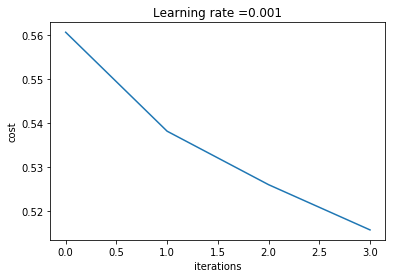

In [134]:

plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.001))
plt.plot(clf.loss_curve_)
plt.show()

In [ ]:
path = 'C:\\Users\\Public\\Documents\\Data\\2018\\imaging_dvices_classifiers\\question_classifier.pickle'
File.dump_pickle(clf, path)



#### Manualy take a look at results

In [75]:
predicted = clf.predict(new_X_test)
predicted

array([1, 0, 0, ..., 1, 1, 1])

In [76]:
z = list(zip(predicted,new_y_test))
total = len(z)
ok = len([tpl for tpl in z if tpl[0] ==tpl[1] ])
print( 1.0*ok/total)

0.9286846275752774


In [96]:
target_names = new_y_test
for i, (item, label_idx) in enumerate(list(zip(X_test, predicted))[:20]):
    question = df.loc[i].values[0]    
    label = target_names[label_idx]       
    expected = target_names[y_test[label_idx]]
    if label == expected:
        res = 'SUCCESS'
    else:
        res = 'FAIL'
    print(f'{i}. {question} => {res} (Predicted: {label})')

0. what does mri show? => SUCCESS (Predicted: 0)
1. where does axial section mri abdomen show hypoechoic mass? => SUCCESS (Predicted: 0)
2. what do arrows denote  noncontrast ct pelvis? => SUCCESS (Predicted: 0)
3. what was normal? => SUCCESS (Predicted: 0)
4. what shows evidence a contaed rupture? => SUCCESS (Predicted: 0)
5. what does preoperative ct demonstrate? => SUCCESS (Predicted: 0)
6. what does axial contracted ct section show? => SUCCESS (Predicted: 0)
7. where does sagittal reformatted ct  pelvis show a contrastfilled vaga? => SUCCESS (Predicted: 0)
8. what does coronal ct demonstrate? => SUCCESS (Predicted: 0)
9. what shows site size farct three study patients? => SUCCESS (Predicted: 0)
10. what does coronal reformatted ct demonstrate multiple bilateral ns ? => SUCCESS (Predicted: 0)
11. where does ct show enlarged lymph node? => SUCCESS (Predicted: 0)
12. what shows complete healg  tumor? => SUCCESS (Predicted: 0)
13. what does mri bra show? => SUCCESS (Predicted: 0)
14. w

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring

{'accuracy': make_scorer(accuracy_score), 'prec': 'precision'}